In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel, linear_kernel, cosine_similarity

In [2]:
data1 = pd.read_csv('Engineering books data/agri_data.csv')
data2 = pd.read_csv('Engineering books data/bio_data.csv')
data3 = pd.read_csv('Engineering books data/civil_data.csv')
data4 = pd.read_csv('Engineering books data/cse_data.csv')
data5 = pd.read_csv('Engineering books data/ec_data.csv')
data6 = pd.read_csv('Engineering books data/eee_data.csv')
data7 = pd.read_csv('Engineering books data/it_data.csv')
data8 = pd.read_csv('Engineering books data/mech_data.csv')
data9 = pd.read_csv('Engineering books data/robotic_data.csv')
data10 = pd.read_csv('Engineering books data/additional_data.csv')

In [3]:
df = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]
data = pd.concat(df)
data = data.reset_index(drop=True)

In [4]:
data.shape

(2375, 10)

In [5]:
data

,title,author,image,desc,download_link,pages,publisher,year,language,file
0,"Soil Mechanics of Earthworks, Foundations and ...",NaN,https://covers.zlibcdn2.com/covers100/books/01...,\n This is the third volume...,https://1lib.in/dl/2279969/9cd462,354,Elsevier Science,1988,english,"PDF, 9.35 MB"
1,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB"
2,Practical Problems in Soil Mechanics and Found...,Sheng Y. Peng,https://covers.zlibcdn2.com/covers100/books/7d...,Unknown,https://1lib.in/dl/2800423/3ccf77,346,Elsevier Science Ltd,1985,english,"PDF, 9.86 MB"
3,Underwater Embankments on Soft Soil A Case His...,William F. van Impe,https://covers.zlibcdn2.com/covers100/books/2b...,Unknown,https://1lib.in/dl/981008/e79e1d,154,Unknown,2007,english,"PDF, 3.35 MB"
4,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420,Unknown,2007,english,"PDF, 10.67 MB"
...,...,...,...,...,...,...,...,...,...,...
2370,Search Engines: Information Retrieval in Practice,W. Bruce Croft,https://covers.zlibcdn2.com/covers100/books/01...,Unknown,https://1lib.in/dl/5148053/69b42b,542,Pearson,2009,english,"PDF, 9.11 MB"
2371,Web Information Retrieval,Stefano Ceri,https://covers.zlibcdn2.com/covers100/books/8e...,\nWith the proliferation of huge amounts of (h...,https://1lib.in/dl/2167059/097330,284,Springer-Verlag Berlin Heidelberg,2013,english,"PDF, 7.44 MB"
2372,Modern Information Retrieval,Ricardo Baeza-Yates,https://covers.zlibcdn2.com/covers100/books/7f...,\n Discusses the changes in...,https://1lib.in/dl/605897/eb0156,103,ACM Press; Addison-Wesley,1999,english,"PDF, 1.95 MB"
2373,Information Access through Search Engines and ...,Maristella Agosti (Editor),https://covers.zlibcdn2.com/covers100/books/a7...,\n The Information Manageme...,https://1lib.in/dl/937104/93711b,214,Unknown,2007,english,"PDF, 3.67 MB"


In [6]:
data.isnull().sum()

title             0
author           22
image             3
desc              0
download_link     0
pages             0
publisher         0
year              0
language          0
file              0
dtype: int64

In [7]:
data = data.dropna()
data = data.reset_index(drop=True)

In [8]:
data.isnull().sum()

title            0
author           0
image            0
desc             0
download_link    0
pages            0
publisher        0
year             0
language         0
file             0
dtype: int64

In [9]:
data = data[data['desc'] !='Unknown']
data = data.reset_index(drop=True)
data.shape

(1744, 10)

In [12]:
data = data[data['download_link'] != 'Unknown']
data = data.reset_index(drop=True)
data.shape

(1736, 10)

In [13]:
unknown_author = data[data['author'] == 'Unknown']
unknown_desc = data[data['desc'] == 'Unknown']
unknown_download_link = data[data['download_link'] == 'Unknown']
unknown_pages = data[data['pages'] == 'Unknown']
unknown_publisher = data[data['publisher'] == 'Unknown']
unknown_year = data[data['year'] == 'Unknown']
unknown_language = data[data['language'] == 'Unknown']
unknown_file = data[data['file'] == 'Unknown']
unknown_img = data[data['image'] == 'Unknown']

In [14]:
print('unknown authors:', len(unknown_author))
print('unknown desc:',len(unknown_desc))
print('unknown download link:', len(unknown_download_link))
print('unknown pages:', len(unknown_pages))
print('unknown publisher:', len(unknown_publisher))
print('unknown year:', len(unknown_year))
print('unknown language:', len(unknown_language))
print('unknown file:', len(unknown_file))
print('unknown image:', len(unknown_img))

unknown authors: 0
unknown desc: 0
unknown download link: 0
unknown pages: 205
unknown publisher: 134
unknown year: 46
unknown language: 2
unknown file: 0
unknown image: 0


In [15]:
data['lower title'] = data['title'].str.lower()

In [16]:
data

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...
1,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420,Unknown,2007,english,"PDF, 10.67 MB",eco- and ground bio-engineering: the use of ve...
2,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...
3,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...
4,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics
...,...,...,...,...,...,...,...,...,...,...,...
1731,Quantum-Like Models for Information Retrieval ...,Diederik Aerts,https://covers.zlibcdn2.com/covers100/books/85...,\nRecent years have been characterized by trem...,https://1lib.in/dl/5399359/157c21,Unknown,Springer International Publishing,2019,english,"PDF, 2.87 MB",quantum-like models for information retrieval ...
1732,Web Information Retrieval,Stefano Ceri,https://covers.zlibcdn2.com/covers100/books/8e...,\nWith the proliferation of huge amounts of (h...,https://1lib.in/dl/2167059/097330,284,Springer-Verlag Berlin Heidelberg,2013,english,"PDF, 7.44 MB",web information retrieval
1733,Modern Information Retrieval,Ricardo Baeza-Yates,https://covers.zlibcdn2.com/covers100/books/7f...,\n Discusses the changes in...,https://1lib.in/dl/605897/eb0156,103,ACM Press; Addison-Wesley,1999,english,"PDF, 1.95 MB",modern information retrieval
1734,Information Access through Search Engines and ...,Maristella Agosti (Editor),https://covers.zlibcdn2.com/covers100/books/a7...,\n The Information Manageme...,https://1lib.in/dl/937104/93711b,214,Unknown,2007,english,"PDF, 3.67 MB",information access through search engines and ...


In [18]:
data = data.drop_duplicates(subset=['lower title'])
data = data.reset_index(drop=True)
data.shape

(1461, 11)

In [19]:
data['title length'] = ''
def title_length(column):
    for i in range(column.shape[0]):
        length = len(column[i])
        data['title length'][i] = length

In [20]:
title_length(data['title'])

In [21]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144
1,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420,Unknown,2007,english,"PDF, 10.67 MB",eco- and ground bio-engineering: the use of ve...,197
2,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132
3,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142
4,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28


C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='title length', ylabel='Density'>

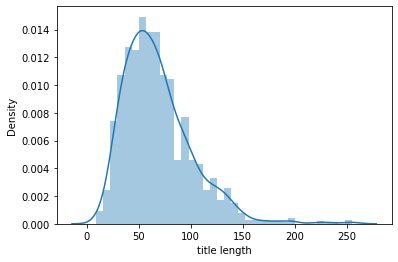

In [22]:
sns.distplot(data['title length'])

In [23]:
data = data[data['title length'] < 180]
data = data.reset_index(drop=True)

C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='title length', ylabel='Density'>

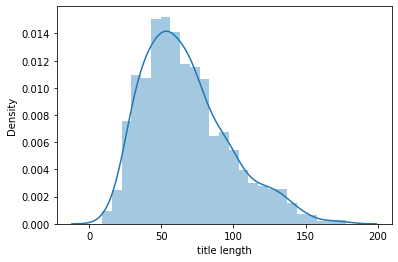

In [24]:
sns.distplot(data['title length'])

In [25]:
data.shape

(1447, 12)

In [26]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51


In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
def cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [30]:
clean_data = data.title.apply(cleaning)


In [31]:
clean_data

0       Foundation Engineering Design Construction Tro...
1       Education Training GeoEngineering Sciences Soi...
2       Soil Water Contamination molecular catchment s...
3                               Principles Thermodynamics
4         Thermodynamics Engineering Approach 8th Edition
                              ...                        
1442    Textual Visual Information Retrieval using Que...
1443    QuantumLike Models Information Retrieval Decis...
1444                            Web Information Retrieval
1445    Information Access Search Engines Digital Libr...
1446     Issues Use Neural Networks Information Retrieval
Name: title, Length: 1447, dtype: object

In [32]:
data.title

0       Foundation Engineering: Design and Constructio...
1       Education and Training in Geo-Engineering Scie...
2       Soil and Water Contamination: From molecular t...
3                            Principles of Thermodynamics
4       Thermodynamics: An Engineering Approach 8th Ed...
                              ...                        
1442    Textual and Visual Information Retrieval using...
1443    Quantum-Like Models for Information Retrieval ...
1444                            Web Information Retrieval
1445    Information Access through Search Engines and ...
1446    Issues in the Use of Neural Networks in Inform...
Name: title, Length: 1447, dtype: object

In [33]:
data['recommend char'] = clean_data

In [34]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,recommend char
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,Foundation Engineering Design Construction Tro...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,Education Training GeoEngineering Sciences Soi...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,Soil Water Contamination molecular catchment s...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,Principles Thermodynamics
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,Thermodynamics Engineering Approach 8th Edition


In [36]:
# data['large image'] = ''
data['large image'] = data['image']
for i in range(data.shape[0]):
    data['large image'][i] = data['large image'][i].replace('covers100', 'covers300')

In [37]:
data

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,recommend char,large image
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,Foundation Engineering Design Construction Tro...,https://covers.zlibcdn2.com/covers300/books/1b...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,Education Training GeoEngineering Sciences Soi...,https://covers.zlibcdn2.com/covers300/books/2a...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,Soil Water Contamination molecular catchment s...,https://covers.zlibcdn2.com/covers300/books/3e...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,Principles Thermodynamics,https://covers.zlibcdn2.com/covers300/books/29...
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,Thermodynamics Engineering Approach 8th Edition,https://covers.zlibcdn2.com/covers300/books/6a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,Textual and Visual Information Retrieval using...,S.G. Shaila,https://covers.zlibcdn2.com/covers100/books/fc...,\nThis book offers comprehensive coverage of i...,https://1lib.in/dl/3664508/888c47,Unknown,Springer Singapore,2018,english,"PDF, 6.78 MB",textual and visual information retrieval using...,84,Textual Visual Information Retrieval using Que...,https://covers.zlibcdn2.com/covers300/books/fc...
1443,Quantum-Like Models for Information Retrieval ...,Diederik Aerts,https://covers.zlibcdn2.com/covers100/books/85...,\nRecent years have been characterized by trem...,https://1lib.in/dl/5399359/157c21,Unknown,Springer International Publishing,2019,english,"PDF, 2.87 MB",quantum-like models for information retrieval ...,65,QuantumLike Models Information Retrieval Decis...,https://covers.zlibcdn2.com/covers300/books/85...
1444,Web Information Retrieval,Stefano Ceri,https://covers.zlibcdn2.com/covers100/books/8e...,\nWith the proliferation of huge amounts of (h...,https://1lib.in/dl/2167059/097330,284,Springer-Verlag Berlin Heidelberg,2013,english,"PDF, 7.44 MB",web information retrieval,25,Web Information Retrieval,https://covers.zlibcdn2.com/covers300/books/8e...
1445,Information Access through Search Engines and ...,Maristella Agosti (Editor),https://covers.zlibcdn2.com/covers100/books/a7...,\n The Information Manageme...,https://1lib.in/dl/937104/93711b,214,Unknown,2007,english,"PDF, 3.67 MB",information access through search engines and ...,98,Information Access Search Engines Digital Libr...,https://covers.zlibcdn2.com/covers300/books/a7...


In [38]:
data['medium image'] = data['image']
for i in range(data.shape[0]):
    data['medium image'][i] = data['medium image'][i].replace('covers100', 'covers200')

In [39]:
data

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,recommend char,large image,medium image
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,Foundation Engineering Design Construction Tro...,https://covers.zlibcdn2.com/covers300/books/1b...,https://covers.zlibcdn2.com/covers200/books/1b...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,Education Training GeoEngineering Sciences Soi...,https://covers.zlibcdn2.com/covers300/books/2a...,https://covers.zlibcdn2.com/covers200/books/2a...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,Soil Water Contamination molecular catchment s...,https://covers.zlibcdn2.com/covers300/books/3e...,https://covers.zlibcdn2.com/covers200/books/3e...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,Principles Thermodynamics,https://covers.zlibcdn2.com/covers300/books/29...,https://covers.zlibcdn2.com/covers200/books/29...
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,Thermodynamics Engineering Approach 8th Edition,https://covers.zlibcdn2.com/covers300/books/6a...,https://covers.zlibcdn2.com/covers200/books/6a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,Textual and Visual Information Retrieval using...,S.G. Shaila,https://covers.zlibcdn2.com/covers100/books/fc...,\nThis book offers comprehensive coverage of i...,https://1lib.in/dl/3664508/888c47,Unknown,Springer Singapore,2018,english,"PDF, 6.78 MB",textual and visual information retrieval using...,84,Textual Visual Information Retrieval using Que...,https://covers.zlibcdn2.com/covers300/books/fc...,https://covers.zlibcdn2.com/covers200/books/fc...
1443,Quantum-Like Models for Information Retrieval ...,Diederik Aerts,https://covers.zlibcdn2.com/covers100/books/85...,\nRecent years have been characterized by trem...,https://1lib.in/dl/5399359/157c21,Unknown,Springer International Publishing,2019,english,"PDF, 2.87 MB",quantum-like models for information retrieval ...,65,QuantumLike Models Information Retrieval Decis...,https://covers.zlibcdn2.com/covers300/books/85...,https://covers.zlibcdn2.com/covers200/books/85...
1444,Web Information Retrieval,Stefano Ceri,https://covers.zlibcdn2.com/covers100/books/8e...,\nWith the proliferation of huge amounts of (h...,https://1lib.in/dl/2167059/097330,284,Springer-Verlag Berlin Heidelberg,2013,english,"PDF, 7.44 MB",web information retrieval,25,Web Information Retrieval,https://covers.zlibcdn2.com/covers300/books/8e...,https://covers.zlibcdn2.com/covers200/books/8e...
1445,Information Access through Search Engines and ...,Maristella Agosti (Editor),https://covers.zlibcdn2.com/covers100/books/a7...,\n The Information Manageme...,https://1lib.in/dl/937104/93711b,214,Unknown,2007,english,"PDF, 3.67 MB",information access through search engines and ...,98,

In [40]:
data['clean desc'] = ''
for i in range(data.shape[0]):
    splited = data['desc'][i].split()
    clean_data = ' '.join(splited)
    data['clean desc'][i] = clean_data
    

In [41]:
data['clean desc'][0][:250]

'Residual soils are found in many parts of the world. Like other soils, they are used extensively in construction, being built upon and used as construction materials. Residual soils are formed when the processes of rock weathering proceed at a faster'

In [42]:
data

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,recommend char,large image,medium image,clean desc
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,Foundation Engineering Design Construction Tro...,https://covers.zlibcdn2.com/covers300/books/1b...,https://covers.zlibcdn2.com/covers200/books/1b...,Residual soils are found in many parts of the ...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,Education Training GeoEngineering Sciences Soi...,https://covers.zlibcdn2.com/covers300/books/2a...,https://covers.zlibcdn2.com/covers200/books/2a...,In recent years the International Society for ...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,Soil Water Contamination molecular catchment s...,https://covers.zlibcdn2.com/covers300/books/3e...,https://covers.zlibcdn2.com/covers200/books/3e...,This textbook provides an overview of transpor...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,Principles Thermodynamics,https://covers.zlibcdn2.com/covers300/books/29...,https://covers.zlibcdn2.com/covers200/books/29...,"In this introductory textbook, thermodynamics ..."
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,Thermodynamics Engineering Approach 8th Edition,https://covers.zlibcdn2.com/covers300/books/6a...,https://covers.zlibcdn2.com/covers200/books/6a...,"Thermodynamics, An Engineering Approach, eight..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,Textual and Visual Information Retrieval using...,S.G. Shaila,https://covers.zlibcdn2.com/covers100/books/fc...,\nThis book offers comprehensive coverage of i...,https://1lib.in/dl/3664508/888c47,Unknown,Springer Singapore,2018,english,"PDF, 6.78 MB",textual and visual information retrieval using...,84,Textual Visual Information Retrieval using Que...,https://covers.zlibcdn2.com/covers300/books/fc...,https://covers.zlibcdn2.com/covers200/books/fc...,This book offers comprehensive coverage of inf...
1443,Quantum-Like Models for Information Retrieval ...,Diederik Aerts,https://covers.zlibcdn2.com/covers100/books/85...,\nRecent years have been characterized by trem...,https://1lib.in/dl/5399359/157c21,Unknown,Springer International Publishing,2019,english,"PDF, 2.87 MB",quantum-like models for information retrieval ...,65,QuantumLike Models Information Retrieval Decis...,https://covers.zlibcdn2.com/covers300/books/85...,https://covers.zlibcdn2.com/covers200/books/85...,Recent years have been characterized by tremen...
1444,Web Information Retrieval,Stefano Ceri,https://covers.zlibcdn2.com/covers100/books/8e...,\nWith the proliferation of huge amounts of (h...,https://1lib.in/dl/2167059/097330,284,Springer-Verlag Berlin Heidelberg,2013,english,"PDF, 7.44 MB",web information retrieval,25,Web Information Retrieval,https://covers.zlibc

In [45]:
data.to_csv('engineering_data.csv', index=False)

In [44]:
print(list(data.title))

['Foundation Engineering: Design and Construction in Tropical Soils (Balkema: Proceedings and Monographs in Engineering, Water and Earth Sciences)', 'Education and Training in Geo-Engineering Sciences: Soil Mechanics and Geotechnical Engineering, Engineering Geology, Rock Mechanics', 'Soil and Water Contamination: From molecular to catchment scale (Balkema: Proceedings and Monographs in Engineering, Water and Earth Sciences)', 'Principles of Thermodynamics', 'Thermodynamics: An Engineering Approach 8th Edition', 'Thermal Physics: Thermodynamics and Statistical Mechanics for Scientists and Engineers', "A Student's Guide to Entropy", 'Fundamentals of Physics: Mechanics, Relativity, and Thermodynamics', 'Introduction to Chemical Engineering Thermodynamics', 'Statistical Mechanics Made Easy: A Guide for Students and Researchers', 'Entropy demystified: the second law of thermodynamics reduced to plain common sense', 'Instructor Solutions Manual for Thermodynamics: An Engineering Approach', 